In [11]:
import pandas as pd
import matplotlib
import seaborn as sns
import cufflinks as cf

cf.go_offline()
data = pd.read_csv(r'C:\Users\Abhinay\Downloads\UCI_Credit_Card.csv')
pd.pandas.set_option('display.max_columns',None)
data.head()
# No Null or missing Values in DataSet

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Learning Decision Tree

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Testing

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(Y_pred, Y_test)
print('Accuracy score = ',score)
print(classification_report(Y_pred,Y_test))

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(Y_pred, Y_test)
print(score)
print(classification_report(Y_pred,Y_test))

In [ ]:
sns.countplot(Y_train)

In [ ]:

sns.lineplot(x=Y_pred,y=Y_test)

In [ ]:
# Removed invalid records from Training set after merging LIMIT_BAL only for achieving better results
from sklearn.model_selection import train_test_split

X1 = data[data.columns[6:12]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)

#Removal of invalid values from training set
X_train=X_train.loc[(X_train['LIMIT_BAL']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:7]

# Removed records having invalid values in columns from PAY_0 till PAY_AMT6
#data=data.loc[ (data['MARRIAGE']!=0) & (data['BILL_AMT1']>=0) & (data['BILL_AMT2']>=0) & (data['BILL_AMT3']>=0) & (data['BILL_AMT4']>=0) & (data['BILL_AMT5']>=0) & (data['BILL_AMT6']>=0) & (data['PAY_AMT1']>=0) & (data['PAY_AMT2']>=0) & (data['PAY_AMT3']>=0) & (data['PAY_AMT4']>=0) & (data['PAY_AMT5']>=0) & (data['PAY_AMT6']>=0) & (data['PAY_0']!=0) & (data['PAY_0']!=-2) & (data['PAY_2']!=0) & (data['PAY_2']!=-2) & (data['PAY_3']!=0) & (data['PAY_3']!=-2) & (data['PAY_4']!=0) & (data['PAY_4']!=-2) & (data['PAY_5']!=0) & (data['PAY_5']!=-2) & (data['PAY_6']!=0) & (data['PAY_6']!=-2)]

# Converted Unknown in education to others
#data['EDUCATION'].replace(to_replace=[4,5,6], value=4, inplace=True)

# Learning Decision Tree

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Testing Scores
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(Y_pred, Y_test)
print('Accuracy score = ',score)
print(classification_report(Y_pred,Y_test))

# Latest Version

In [43]:
# Removed invalid records from Training set after merging LIMIT_BAL only for achieving better results
from sklearn.model_selection import train_test_split

X1 = data[data.columns[6:24]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)


# Removed records having invalid values in columns from PAY_0 till PAY_AMT6, BILL_AMT
X_train=X_train.loc[ (X_train['BILL_AMT1']>=0) & (X_train['BILL_AMT2']>=0) & (X_train['BILL_AMT3']>=0) & (X_train['BILL_AMT4']>=0) & (X_train['BILL_AMT5']>=0) & (X_train['BILL_AMT6']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

#Splitting data in X_train & Y_train

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:19]
# Converted Unknown in education to others
#data['EDUCATION'].replace(to_replace=[4,5,6], value=4, inplace=True)

# Applying GridSearchCV
##############################


from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
model = tree.DecisionTreeClassifier()



# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param = {'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,5,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best']}
grid_search=GridSearchCV(estimator=model, param_grid=grid_param, cv=10, scoring='f1')
grid_search.fit(X_train, Y_train)
pred = grid_search.predict(X_test)
print(accuracy_score(pred, Y_test))
print(classification_report(pred,Y_test))
#######################################

0.79
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      8068
           1       0.26      0.55      0.35       932

    accuracy                           0.79      9000
   macro avg       0.60      0.69      0.61      9000
weighted avg       0.87      0.79      0.82      9000



In [44]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [12]:
grid_search.best_score_

0.6765394265645486

In [41]:
# Learning Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

X1 = data[data.columns[6:24]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70, shuffle=True)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)


# Removed records having invalid values in columns from PAY_0 till PAY_AMT6, BILL_AMT
X_train=X_train.loc[ (X_train['BILL_AMT1']>=0) & (X_train['BILL_AMT2']>=0) & (X_train['BILL_AMT3']>=0) & (X_train['BILL_AMT4']>=0) & (X_train['BILL_AMT5']>=0) & (X_train['BILL_AMT6']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

#Splitting data in X_train & Y_train

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:19]

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter='best')
model.fit(X_train, Y_train)

# Testing Scores
Y_pred = model.predict(X_test)


score = accuracy_score(Y_pred, Y_test)
print('Accuracy score = ',score)
print(classification_report(Y_pred,Y_test))

Accuracy score =  0.8012222222222222
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      8460
           1       0.19      0.68      0.29       540

    accuracy                           0.80      9000
   macro avg       0.58      0.75      0.59      9000
weighted avg       0.93      0.80      0.85      9000



In [ ]:
# Removed invalid records from Training set after merging LIMIT_BAL only for achieving better results + Cross Validation
from sklearn.model_selection import train_test_split

X1 = data[data.columns[6:12]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)

#Removal of invalid values from training set
X_train=X_train.loc[(X_train['LIMIT_BAL']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:7]

# Removed records having invalid values in columns from PAY_0 till PAY_AMT6
data=data.loc[ (data['MARRIAGE']!=0) & (data['BILL_AMT1']>=0) & (data['BILL_AMT2']>=0) & (data['BILL_AMT3']>=0) & (data['BILL_AMT4']>=0) & (data['BILL_AMT5']>=0) & (data['BILL_AMT6']>=0) & (data['PAY_AMT1']>=0) & (data['PAY_AMT2']>=0) & (data['PAY_AMT3']>=0) & (data['PAY_AMT4']>=0) & (data['PAY_AMT5']>=0) & (data['PAY_AMT6']>=0) & (data['PAY_0']!=0) & (data['PAY_0']!=-2) & (data['PAY_2']!=0) & (data['PAY_2']!=-2) & (data['PAY_3']!=0) & (data['PAY_3']!=-2) & (data['PAY_4']!=0) & (data['PAY_4']!=-2) & (data['PAY_5']!=0) & (data['PAY_5']!=-2) & (data['PAY_6']!=0) & (data['PAY_6']!=-2)]

# Converted Unknown in education to others
data['EDUCATION'].replace(to_replace=[4,5,6], value=4, inplace=True)

# Applying Cross Validation
##############################


### Was supposed to give highest Precision and lowest Recall

In [ ]:
from sklearn.model_selection import train_test_split

X1 = data[data.columns[6:12]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)

#Removal of invalid values from training set
X_train=X_train.loc[(X_train['LIMIT_BAL']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:7]

# Removed records having invalid values in columns from PAY_0 till PAY_AMT6
data=data.loc[ (data['MARRIAGE']!=0) & (data['BILL_AMT1']>=0) & (data['BILL_AMT2']>=0) & (data['BILL_AMT3']>=0) & (data['BILL_AMT4']>=0) & (data['BILL_AMT5']>=0) & (data['BILL_AMT6']>=0) & (data['PAY_AMT1']>=0) & (data['PAY_AMT2']>=0) & (data['PAY_AMT3']>=0) & (data['PAY_AMT4']>=0) & (data['PAY_AMT5']>=0) & (data['PAY_AMT6']>=0) & (data['PAY_0']!=0) & (data['PAY_0']!=-2) & (data['PAY_2']!=0) & (data['PAY_2']!=-2) & (data['PAY_3']!=0) & (data['PAY_3']!=-2) & (data['PAY_4']!=0) & (data['PAY_4']!=-2) & (data['PAY_5']!=0) & (data['PAY_5']!=-2) & (data['PAY_6']!=0) & (data['PAY_6']!=-2)]

# Learning Decision Tree

from sklearn import tree
model = tree.DecisionTreeClassifier()
#model.fit(X_train, Y_train)

# Testing Scores
#Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
#score = accuracy_score(Y_pred, Y_test)
#print('Accuracy score = ',score)
#print(classification_report(Y_pred,Y_test))


#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param = {'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best']}
grid_search=GridSearchCV(estimator=model, param_grid=grid_param, cv=10)
grid_search.fit(X_train, Y_train)
pred = grid_search.predict(X_test)
print(accuracy_score(pred, Y_test))
print(classification_report(pred,Y_test))

In [ ]:
grid_search.best_params_

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter='best')
model.fit(X_train, Y_train)
pred=model.predict(X_test)

print(accuracy_score(pred, Y_test))
print(classification_report(pred,Y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

# Stratified K-Fold Cross Validation instead of train_test_split

In [ ]:
# Removed invalid records from Training set after merging LIMIT_BAL only for achieving better results + Cross Validation
from sklearn.model_selection import StratifiedKFold

X1 = data[data.columns[6:12]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.70)

X_train = X_train.merge(Y_train, left_index=True, right_index=True)

#Removal of invalid values from training set
X_train=X_train.loc[(X_train['LIMIT_BAL']>=0) & (X_train['PAY_0']!=0) & (X_train['PAY_0']!=-2) & (X_train['PAY_2']!=0) & (X_train['PAY_2']!=-2) & (X_train['PAY_3']!=0) & (X_train['PAY_3']!=-2) & (X_train['PAY_4']!=0) & (X_train['PAY_4']!=-2) & (X_train['PAY_5']!=0) & (X_train['PAY_5']!=-2) & (X_train['PAY_6']!=0) & (X_train['PAY_6']!=-2)]

Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:7]

# Removed records having invalid values in columns from PAY_0 till PAY_AMT6
data=data.loc[ (data['MARRIAGE']!=0) & (data['BILL_AMT1']>=0) & (data['BILL_AMT2']>=0) & (data['BILL_AMT3']>=0) & (data['BILL_AMT4']>=0) & (data['BILL_AMT5']>=0) & (data['BILL_AMT6']>=0) & (data['PAY_AMT1']>=0) & (data['PAY_AMT2']>=0) & (data['PAY_AMT3']>=0) & (data['PAY_AMT4']>=0) & (data['PAY_AMT5']>=0) & (data['PAY_AMT6']>=0) & (data['PAY_0']!=0) & (data['PAY_0']!=-2) & (data['PAY_2']!=0) & (data['PAY_2']!=-2) & (data['PAY_3']!=0) & (data['PAY_3']!=-2) & (data['PAY_4']!=0) & (data['PAY_4']!=-2) & (data['PAY_5']!=0) & (data['PAY_5']!=-2) & (data['PAY_6']!=0) & (data['PAY_6']!=-2)]

# Converted Unknown in education to others
data['EDUCATION'].replace(to_replace=[4,5,6], value=4, inplace=True)

# Applying Cross Validation
##############################


# After finding best Params, we applied the same below and subsequently applied Stratified K Fold Cross Validation on Training set

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter='best')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

list_accu_stratified=[]
list_classification_report=[]

for train_index, test_index in skf.split(X, Y): # X,Y needs to contain only Training data
    x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = Y.loc[train_index], Y.loc[test_index]
    model.fit(x_train_fold, y_train_fold)
    pred=model.predict(x_test_fold)
    list_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    list_classification_report.append(classification_report(pred, y_test_fold))


In [49]:
import numpy as np
print(list_accu_stratified)
print(np.mean(list_accu_stratified))

[0.819, 0.8253333333333334, 0.8226666666666667, 0.8223333333333334, 0.8203333333333334, 0.8176666666666667, 0.815, 0.8176666666666667, 0.81, 0.8266666666666667]
0.8196666666666668


In [50]:
for i in list_classification_report:
    print(i)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2729
           1       0.30      0.72      0.42       271

    accuracy                           0.82      3000
   macro avg       0.63      0.78      0.66      3000
weighted avg       0.91      0.82      0.85      3000

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2666
           1       0.36      0.71      0.47       334

    accuracy                           0.83      3000
   macro avg       0.66      0.77      0.69      3000
weighted avg       0.89      0.83      0.85      3000

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2710
           1       0.32      0.73      0.44       290

    accuracy                           0.82      3000
   macro avg       0.64      0.78      0.67      3000
weighted avg       0.90      0.82      0.85      3000

              preci

# Splits dataset into Training and Testing set, doesn't clean data, nor does hyper paramet tuning.
# Selected few values for Hyperparameter in Decision Tree Classifier

In [26]:
# Splits dataset into Training and Testing set, doesn't clean data, nor does hyper paramet tuning.
# Selected few values for Hyperparameter in Decision Tree Classifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree

# Below params give higher Precision for 1 and lower Recall
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter='best')

#model = tree.DecisionTreeClassifier(criterion='gini', splitter='best')

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.40, shuffle=True)

model.fit(X_train_resampled, Y_train_resampled)
pred = model.predict(X_test)

print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6700
           1       0.55      0.48      0.51      2300

    accuracy                           0.77      9000
   macro avg       0.69      0.67      0.68      9000
weighted avg       0.76      0.77      0.76      9000



# After testing code without removing invalid values and keeping Training set as 50%(70% subsequently) the below code is an attempt to get best params. Both 50% & 70% training sets give same params. 50% & Max depth till 11

In [114]:
# Removed invalid records from Training set after merging LIMIT_BAL only for achieving better results
from sklearn.model_selection import train_test_split

X1 = data[data.columns[6:24]]
X2 = data[data.columns[1:2]]
Y = data[data.columns[-1]]

X = pd.concat([X1,X2], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.50)

# Converted Unknown in education to others
#data['EDUCATION'].replace(to_replace=[4,5,6], value=4, inplace=True)

# Applying GridSearchCV
##############################


from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
model = tree.DecisionTreeClassifier()



# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param = {'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,11,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best']}
grid_search=GridSearchCV(estimator=model, param_grid=grid_param, cv=10, scoring='f1')
grid_search.fit(X_train, Y_train)
pred = grid_search.predict(X_test)
print(accuracy_score(pred, Y_test))
print(classification_report(pred,Y_test))
#######################################

0.8178666666666666
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     13117
           1       0.37      0.65      0.47      1883

    accuracy                           0.82     15000
   macro avg       0.66      0.75      0.68     15000
weighted avg       0.87      0.82      0.84     15000



In [109]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [113]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [115]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'best'}

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

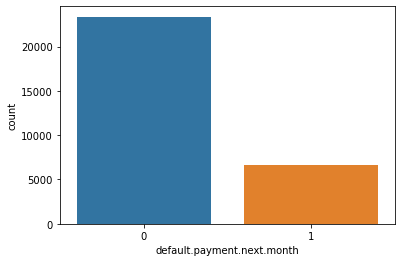

In [130]:
sns.countplot(x=data['default.payment.next.month'])

# RandomUnderSampling done below

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:24]
Y = data.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.5)

sampler = RandomUnderSampler(random_state=29, replacement=True)
X_train_resampled, Y_train_resampled = sampler.fit_resample(X_train, Y_train)

In [22]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((21000, 23), (21000,), (9000, 23), (9000,))

In [23]:
X_train_resampled.shape, Y_train_resampled.shape, X_test.shape, Y_test.shape

((9256, 23), (9256,), (9000, 23), (9000,))

# Applying best params from GridSearchCV

In [39]:
# Splits dataset into Training and Testing set, doesn't clean data, nor does hyper paramet tuning.
# Selected few values for Hyperparameter in Decision Tree Classifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree

# Below params give higher Precision for 1 and lower Recall
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, min_samples_split=3, splitter='best')

#model = tree.DecisionTreeClassifier()

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.40, shuffle=True)

model.fit(X_train_resampled, Y_train_resampled)
pred = model.predict(X_test)

print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79      9677
           1       0.64      0.40      0.49      5323

    accuracy                           0.71     15000
   macro avg       0.68      0.64      0.64     15000
weighted avg       0.70      0.71      0.69     15000



# Trying GridSearchCV Hyperparameter tuning

In [36]:
from sklearn.metrics import accuracy_score, classification_report
model = tree.DecisionTreeClassifier()


# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param = {'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,11,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best']}
grid_search=GridSearchCV(estimator=model, param_grid=grid_param, cv=10, scoring='f1')
grid_search.fit(X_train_resampled, Y_train_resampled)
pred = grid_search.predict(X_test)
print(accuracy_score(pred, Y_test))
print(classification_report(pred,Y_test))

0.7082
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      9715
           1       0.64      0.40      0.49      5285

    accuracy                           0.71     15000
   macro avg       0.68      0.64      0.64     15000
weighted avg       0.70      0.71      0.69     15000



In [38]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}